# Capítulo 2 - Projeto de Aprendizado Ponta a Ponta

In [1]:
# Importar pandas para análise exploratória de dados
import pandas as pd

## Importar Dados

In [2]:
# Ler csv dos dados
Dados = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

# Printar primeira linhas do DataFrame
Dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Explorar Variáveis

In [17]:
# Informações acerca dos dados contidos em cada uma das colunas
Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [18]:
# Descrever os dados em cada coluna
Dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Pelas informações acima, todas as colunas exceto a "ocean_proximity" são float, o que significa que estas seguram valores decimais. É possível perceber que não há valores nulos em quase todas as colunas, exceto na coluna "Total Bedrooms" aonde 207 observações não estão disponíveis. Vamos preencher os valores nulos com a mediana da coluna

In [19]:
# Criar variável com a mediana da coluna
median_total_bedrooms = Dados["total_bedrooms"].median()

# Preencher coluna
Dados["total_bedrooms"].fillna(median_total_bedrooms, inplace=True)

# Contar quantidade de linhas nulas na coluna
Dados["total_bedrooms"].isna().sum()

0

Colunas object geralmente contém variáveis categóricas:

In [20]:
# Valores únicos na coluna ocean_proximity
Dados["ocean_proximity"].unique()

KeyError: 'ocean_proximity'

A coluna ocean_proximity contém valores acerca de quão perto a casa em questão está do oceano

In [ ]:
# Checar a representatividade de cada valor único na coluna no total de observações (valores em %)
Dados["ocean_proximity"].value_counts() / Dados.shape[0]

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

A maior parte das casas (44%) parece estar a menos de uma hora do oceano, com um valor ínfimo estando em ilhas, 11% perto de portos, 12% perto dos oceanos e 31% em "terra firme"

In [ ]:
# Importar Encoder do sklearn
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse=False)

# Criar coluna ocean_proximity como variável categórica (Dummy em econometria)
ocean_proximity_cat = Encoder.fit_transform(Dados[["ocean_proximity"]])

# Print
ocean_proximity_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [21]:
# Observar as catergorias correspondentes a cada número na coluna de ocean_proximity
Encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [10]:
# Podemos transformar a coluna em dummies usando pd.get_dummies
Dummies = pd.get_dummies(Dados["ocean_proximity"])

#Printar
Dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [23]:
Dados_Dummies = pd.concat([Dados, Dummies], axis="columns")

#Printar
Dados_Dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## Visualizar características do DataSet

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

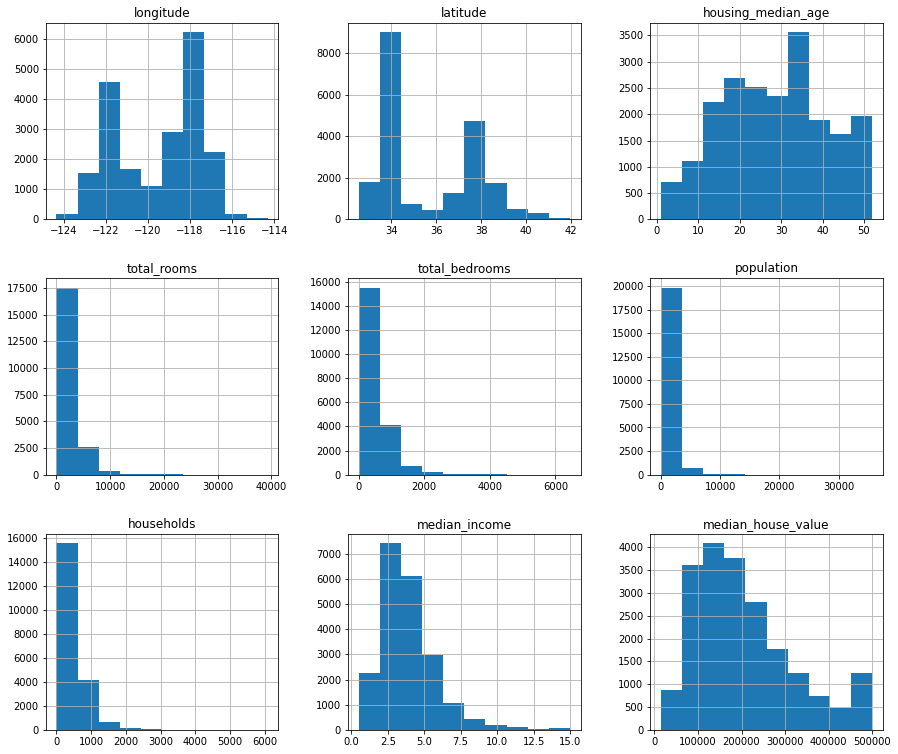

In [24]:
# Plotar a distribuição de cada atributo numérico
Dados.hist(figsize=(15,13))

Parecem haver uma quantidade significativa de outliers na coluna de valor mediano das casas, podemos visualizar isto melhor com um gráfico de boxplot

<AxesSubplot:>

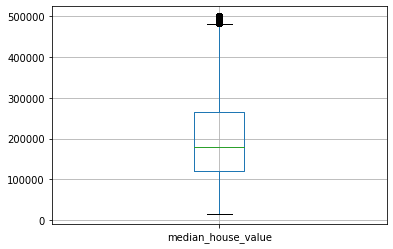

In [25]:
Dados.boxplot(column="median_house_value")

In [26]:
# Matrix de correlação da variável de mediana do valor das casas em relação as outras variáveis
Dados_Dummies.corr()["median_house_value"].sort_values()

INLAND               -0.484859
latitude             -0.144160
longitude            -0.045967
population           -0.024650
ISLAND                0.023416
total_bedrooms        0.049457
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
NEAR OCEAN            0.141862
NEAR BAY              0.160284
<1H OCEAN             0.256617
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

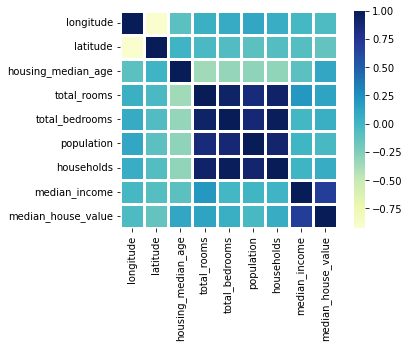

In [27]:
# Visualização das correlações em uma matriz
import seaborn as sns
sns.heatmap(Dados.corr(), square=True, linewidths=3, center=0, cmap="YlGnBu")

É possível perceber que a correlação entre a mediana da renda e o valor das casas é muito grande, com correlações mais fracas, mas ainda positivas, com o total de cômodos numa casa e a mediana da idade dos moradores. Podemos observar melhor a relação entre as variáveis por meio de um scatter plot:

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

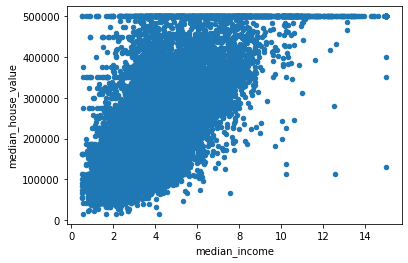

In [28]:
# Scatter plot para median_income e median_house_value
Dados.plot(kind="scatter", x="median_income", y="median_house_value")

## Preparo para modelagem

In [29]:
# Feature Engineering
def Feature_Engineering(Dados):
    Dados["Bed_Per_House"] = Dados["total_bedrooms"] / Dados["households"]
    Dados["Pop_Per_House"] = Dados["population"] / Dados["households"]
    Dados["Rooms_Per_House"] = Dados["total_rooms"] / Dados["households"]

    return Dados

Dados_Novas_Variaveis = Feature_Engineering(Dados_Dummies)
Dados_Novas_Variaveis.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,Bed_Per_House,Pop_Per_House,Rooms_Per_House
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,1.023810,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,0.971880,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,1.073446,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,1.073059,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,1.081081,2.181467,6.281853


In [30]:
# Usar scaler para padronizar dados (Standard), normalização seria por meio de Min-Max Scaling
from sklearn.preprocessing import StandardScaler
Std_Scaler = StandardScaler()

# Padronizar nossos Dados
Dados_Padronizados = Std_Scaler.fit_transform(Dados_Novas_Variaveis)

# Printar DataFrame padronizado
Dados_Padronizados

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.14851426,
        -0.04959654,  0.62855945],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.24854196,
        -0.09251223,  0.32704136],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.05290194,
        -0.02584253,  1.15562047],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.03694948,
        -0.0717345 , -0.09031802],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.13678139,
        -0.09122515, -0.04021111],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.11818237,
        -0.04368215, -0.07044252]])

In [34]:
# TODO Criar Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Pipeline Numérica
Numerical_Pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy="median")),
    ('Scaling', StandardScaler()),
])

Dados_Numericos = Numerical_Pipeline.fit_transform(Dados)

In [35]:
Dados_Numericos

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [ ]:
# Criar variável alvo
y = Dados["median_house_value"]

# Criar dataframe com features
X = Dados.drop("median_house_value", axis=1)

In [ ]:
# Importar função para dividir  dados em treino e teste
from sklearn.model_selection import train_test_split

# importar métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Criar divisões de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Importar modelos:
from sklearn.linear_model import LinearRegression # Regressão Linear
from sklearn.tree import DecisionTreeRegressor # Regressão em árvore

# Criar Objetos com modelos:
Reg_Linear = LinearRegression()
Reg_Arvore = DecisionTreeRegressor()

In [ ]:
# Rodar Modelos
Reg_Linear.fit(X_treino, y_treino)
Reg_Arvore.fit(X_treino, y_treino)

DecisionTreeRegressor()

In [ ]:
# Salvar valores previstos para os X de teste
Predicoes_Lineares = Reg_Linear.predict(X_teste)
Predicoes_Arvore = Reg_Arvore.predict(X_teste)

In [ ]:
# Visualizar e comparar métricas e modelos:
Metricas = pd.DataFrame()
Metricas.index = ["MSE", "MAE"]
Metricas.loc[:,"Linear"] = [mean_squared_error(y_teste, Predicoes_Lineares), mean_absolute_error(y_teste, Predicoes_Lineares)]
Metricas.loc[:,"Arvore"] = [mean_squared_error(y_teste, Predicoes_Arvore), mean_absolute_error(y_teste, Predicoes_Arvore)]
Metricas


,Linear,Arvore
MSE,4.876572e+09,4.766736e+09
MAE,5.106924e+04,4.353541e+04


In [ ]:
# Validação cruzada (Cross Validation):
from sklearn.model_selection import cross_val_score
Validacao_Cruzada_Scores_Arvore = cross_val_score(Reg_Arvore, )
Validacao_Cruzada_Scores_Linear = cross_val_score(Reg_Linear, )
